In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2017855,MapQuest,201.0,2,2018-07-19 20:30:23,2018-07-19 21:14:11,34.153896,-118.275482,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
1,A-3340193,Bing,NaN,2,2020-12-27 13:22:48,2020-12-27 15:02:42,40.261747,-75.250020,40.263001,-75.251072,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3274372,Bing,NaN,2,2020-12-19 20:27:52,2020-12-19 22:23:39,29.980875,-90.073829,29.981676,-90.073111,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2782559,Bing,NaN,3,2016-09-27 17:29:27,2016-09-27 23:29:27,39.018870,-77.102890,39.019580,-77.107080,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-3722269,Bing,NaN,2,2020-02-11 19:22:00,2020-02-11 23:22:00,45.743940,-120.175670,45.743940,-120.175670,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962779 entries, 0 to 2962778
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance.mi.           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [7]:
train.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Number,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,1.901648e+06,2.962779e+06,2.962779e+06,2.962779e+06,1.061131e+06,1.061131e+06,2.962779e+06,1.081417e+06,2.899590e+06,1.634781e+06,2.895631e+06,2.909032e+06,2.893495e+06,2.626594e+06,1.516143e+06
mean,2.083483e+02,2.305150e+00,3.639779e+01,-9.546653e+01,3.689859e+01,-9.859779e+01,3.364814e-01,6.131773e+03,6.148826e+01,5.490369e+01,6.566319e+01,2.969354e+01,9.112050e+00,7.903770e+00,1.237881e-02
std,2.123605e+01,5.334663e-01,4.964845e+00,1.735451e+01,5.166983e+00,1.849527e+01,1.616485e+00,1.249501e+04,1.852392e+01,2.272081e+01,2.273505e+01,8.645410e-01,2.818845e+00,5.339578e+00,1.637462e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457018e+01,-1.244978e+02,0.000000e+00,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352025e+01,-1.173566e+02,3.385400e+01,-1.182073e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582550e+01,-9.001895e+01,3.735016e+01,-9.439028e+01,0.000000e+00,2.893000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018439e+01,-8.084698e+01,4.072576e+01,-8.087304e+01,8.900000e-02,7.328000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.904150e+05,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [8]:
count_1 = len(train[train['Severity'] == 1])
count_2 = len(train[train['Severity'] == 2])
count_3 = len(train[train['Severity'] == 3])
count_4 = len(train[train['Severity'] == 4])

In [9]:
count_1, count_2, count_3, count_4

(20465, 2104772, 750528, 87014)

In [10]:
len(train)

2962779

In [11]:
len(train.dropna())

0

In [12]:
len(train['Severity'].dropna())

2962779

In [13]:
train['Amenity']

0          False
1          False
2          False
3          False
4          False
           ...  
2962774    False
2962775    False
2962776    False
2962777    False
2962778    False
Name: Amenity, Length: 2962779, dtype: bool

In [15]:
(train.isnull().sum()/len(train)) * 100

ID                        0.000000
Source                    0.000000
TMC                      35.815395
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  64.184605
End_Lng                  64.184605
Distance.mi.              0.000000
Description               0.000034
Number                   63.499910
Street                    0.000000
Side                      0.000000
City                      0.003409
County                    0.000000
State                     0.000000
Zipcode                   0.031491
Country                   0.000000
Timezone                  0.110943
Airport_Code              0.215237
Weather_Timestamp         1.488906
Temperature.F.            2.132761
Wind_Chill.F.            44.822715
Humidity...               2.266386
Pressure.in.              1.814074
Visibility.mi.            2.338480
Wind_Direction      

In [16]:
train['Weather_Timestamp']

0          2018-07-19 20:53:00
1          2020-12-27 13:15:00
2          2020-12-19 20:34:00
3          2016-09-27 17:35:00
4          2020-02-11 18:53:00
                  ...         
2962774    2018-05-22 14:29:00
2962775    2019-10-07 08:24:00
2962776    2019-11-13 07:55:00
2962777    2019-11-13 09:01:00
2962778    2019-01-04 08:18:00
Name: Weather_Timestamp, Length: 2962779, dtype: object

In [17]:
train['Start_Time']

0          2018-07-19 20:30:23
1          2020-12-27 13:22:48
2          2020-12-19 20:27:52
3          2016-09-27 17:29:27
4          2020-02-11 19:22:00
                  ...         
2962774    2018-05-22 14:32:36
2962775    2019-10-07 08:26:01
2962776    2019-11-13 07:57:00
2962777    2019-11-13 08:58:22
2962778    2019-01-04 08:24:15
Name: Start_Time, Length: 2962779, dtype: object

In [19]:
duration =  pd.to_datetime(train['End_Time']) - pd.to_datetime(train['Start_Time'])
duration

Timedelta('1061 days 02:53:22')

In [44]:
duration.dt.total_seconds() / (60 * 60)

0          0.730000
1          1.665000
2          1.929722
3          6.000000
4          4.000000
             ...   
2962774    0.492500
2962775    0.748056
2962776    0.550556
2962777    0.484722
2962778    0.490556
Length: 2962779, dtype: float64

In [48]:
X = pd.DataFrame()
X['duration'] = duration.dt.total_seconds() / (60 * 60)
X['severity'] = train['Severity']

In [49]:
X

,duration,severity
0,0.730000,2
1,1.665000,2
2,1.929722,2
3,6.000000,3
4,4.000000,2
...,...,...
2962774,0.492500,3
2962775,0.748056,2
2962776,0.550556,2
2962777,0.484722,2


In [50]:
X.groupby('severity').mean()

,duration
severity,
1,0.669786
2,2.177112
3,1.279415
4,12.612723


In [30]:
X['severity']

0          0
1          0
2          0
3          1
4          0
          ..
2962774    1
2962775    0
2962776    0
2962777    0
2962778    1
Name: severity, Length: 2962779, dtype: int64

In [52]:
X.groupby('severity').quantile(0.25)

,duration
severity,
1,0.250000
2,0.497500
3,0.493611
4,0.493611


In [54]:
X.groupby('severity').quantile(0.5)

,duration
severity,
1,0.582778
2,0.993333
3,0.736111
4,3.316389


In [53]:
X.groupby('severity').quantile(0.75)

,duration
severity,
1,0.750000
2,1.930556
3,0.996667
4,6.000000


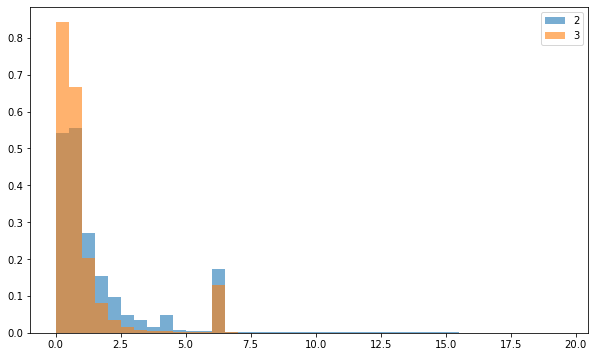

In [63]:
plt.figure(figsize=(10, 6))
# plt.hist(X[X['severity'] == 1]['duration'], label='1',
#          bins=np.arange(0, 20, 0.5), density=True, alpha=0.6)
plt.hist(X[X['severity'] == 2]['duration'], label='2',
         bins=np.arange(0, 20, 0.5), density=True, alpha=0.6)
plt.hist(X[X['severity'] == 3]['duration'], label='3',
         bins=np.arange(0, 20, 0.5), density=True, alpha=0.6)
# plt.hist(X[X['severity'] == 4]['duration'], label='4',
#          bins=np.arange(0, 20, 0.5), density=True, alpha=0.6)
plt.legend()